# Atividades práticas

Vamos utilizar os dados das características sociais e patrimônio dos candidatos a vereador de Curitiba em 2024. Acesse os dados aqui: [candidatos](https://drive.google.com/file/d/1qoA3IEPF9ZK00sTa3jtilvJHBz0DuKO0/view?usp=drive_link) e [bens](https://drive.google.com/file/d/1zDQjmUOKrHL4tlcpkIT6yuMrWBKrl0Vw/view?usp=drive_link)

# Dados e bibliotecas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
candidatos = pd.read_csv('/content/drive/My Drive/curso_python_2025/candidatos_curitiba.csv') #sep = ',' e encoding = 'utf-8' são o default, não precisa preencher

In [ ]:
candidatos.head(2)

,sequencial,nome_urna,genero,instrucao,estado_civil,raca,sigla_partido,situacao,tipo_item,descricao_item,valor_item
0,160002145726,Fernando Das Bolinhas,masculino,ensino medio completo,casado(a),branca,DC,deferido,"Veículo automotor terrestre: caminhão, automóv...",HB20,44000.0
1,160002145726,Fernando Das Bolinhas,masculino,ensino medio completo,casado(a),branca,DC,deferido,Caderneta de poupança,poupança,20000.0


# Exercícios

# Reconhecimento inicial dos dados

1. Escolha um dos arquivos em csv e faça o reconhecimento inicial dos dados utilizando as seguintes funções do pandas
- head e tail
- shape
- columns
- dtypes
- info

Os dados vem bonitinhos por conta do tratamendo da Base dos Dados #ficadica

In [ ]:
# head

In [ ]:
# tail

In [ ]:
# shape

In [ ]:
# columns

In [ ]:
# dtypes

In [ ]:
# info

# Análise Exploratória de Dados

- Filtre os dados para selecionar somente aqueles com candidatura deferida (situacao = 'deferido')

1. Qual é a distribuição de escolaridade entre os candidatos?
2. Faça um gráfico de barras da distribuição de escolaridade.
3. Faça um gráfico de barras de escolaridade por gênero.
4. Como é a distribuição do patrimônio declarado (valor_item) dos candidatos
(média, desvio padrão, mediana, valores mínimo e máximo)?
5. Faça um histograma da distribuição de patrimônio.
6. Classifique o valor total do patrimônio declarado
7. Faça um gráfico de barras da classificação de patrimônio
8. Faça um subset selecionando apenas um partido e refaça o gráfico de barras da classificação de patrimônio

Classes:

- Até 1000 reais
- Entre 1001 e 10000 reais
- Entre 10001 e 100 mil reais
- Entre 100 mil reais e 1 mi
- Entre 1 mi e 10mi
- Acima de 10 mi

## Dicas

### Dicas dos exercícios

1. Para distribuições de frequência, utilize o value_counts
2. Lembre-se que antes de plotar, você ter o que seria a versão da tabela final pronta. O pandas não plota direto com o .plot() colunas que não são numéricas. Então dá pra usar o value_counts direto antes do plot, criar um df novo com o value_counts da coluna, usar o groupby().size() etc. Qualquer opção que não é a mais direta permite maiores customizações nos gráficos posteriormente, especialmente se você for utilizar outras bibliotecas como o matplotlib ou o seaborn.
3. Mesma lógica do anterior, mas dá pra usar o pd.crosstab
4. Usar o .agg ajuda muito!
5. Aqui dá pra usar direto o .hist do pandas!
6. Revisar os diversos jeitos de criar colunas condicionais da aula 2
7. Mesma coisa da questão 2
8. Usar o .loc e aí repetir o gráfico

# Bônus
<br>
Como baixar os dados direto da Base dos Dados

In [ ]:
# selecionar os  candidatos a vereadores
select = """
select c.sequencial, c.nome_urna, c.genero, c.instrucao, c.estado_civil, c.raca, c.sigla_partido, c.situacao, bc.tipo_item, bc.descricao_item, bc.valor_item
from `basedosdados.br_tse_eleicoes.bens_candidato` bc
left join  `basedosdados.br_tse_eleicoes.candidatos` c
on bc.sequencial_candidato = c.sequencial
where bc.ano=2024 and c.id_municipio = '4106902' and c.cargo='vereador' """ #substitua pelo id do seu município

candidatos = bd.read_sql(select, billing_project_id='seu billing ID')

- Tutorial completo sobre como acessar dados da BD [aqui](https://basedosdados.org/blog/como-comecar-sua-analise-com-dados-publicos)
- Catálogo de exemplos de códigos no [GitHub](https://github.com/basedosdados/analises) da BD

# GABARITO

Lembrando que existem diversas formas de chegar a um mesmo resultado. Este gabarito ilustra apenas uma das formas possíveis. Se você pensou em outras soluções mas conseguiu chegar lá, sucesso

# Questões 1 e 2

Qual é a distribuição de escolaridade entre os candidatos?
Faça um gráfico de barras da distribuição de escolaridade.

In [ ]:
candidatos['instrucao'].value_counts()

,count
instrucao,
ensino superior completo,1329
ensino medio completo,378
ensino superior incompleto,171
ensino fundamental completo,42
ensino medio incompleto,35
ensino fundamental incompleto,27
le e escreve,15


<Axes: ylabel='instrucao'>

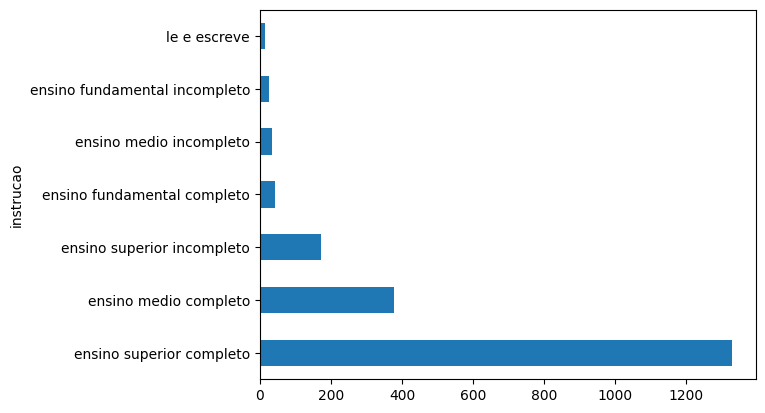

In [ ]:
candidatos['instrucao'].value_counts().plot(kind = 'barh')

# Questão 3

Faça um gráfico de barras de escolaridade por gênero.

<Axes: ylabel='instrucao'>

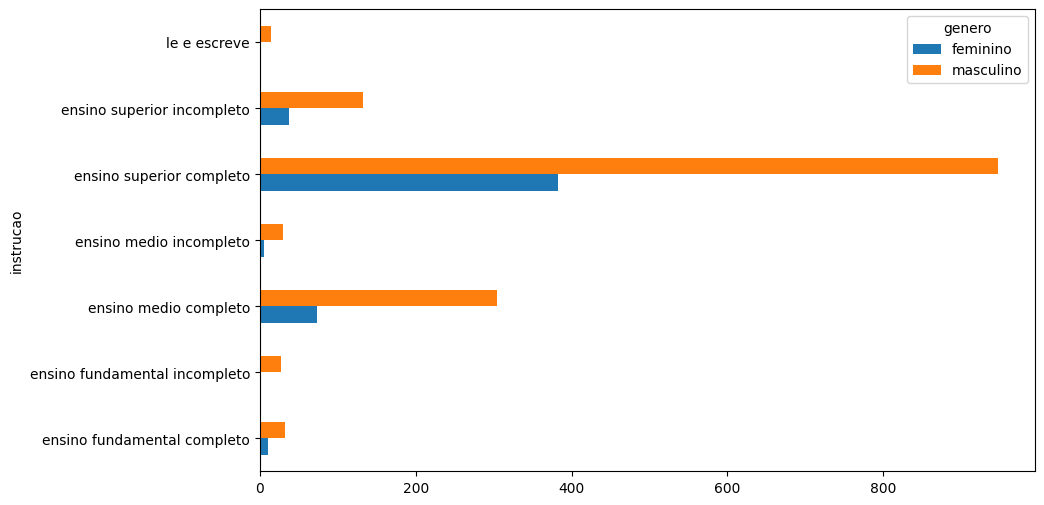

In [ ]:
pd.crosstab(candidatos['instrucao'], candidatos['genero']).plot(kind='barh', figsize=(10,6))

# Questões 4 e 5

Como é a distribuição do patrimônio declarado (valor_item) dos candidatos (média, desvio padrão, mediana, valores mínimo e máximo)?
Faça um histograma da distribuição de patrimônio.

In [ ]:
stats = candidatos['valor_item'].agg({
    'media': 'mean',
    'desvio_padrao': 'std',
    'mediana': 'median',
    'minimo': 'min',
    'maximo': 'max',
    'soma': 'sum'
})
stats

,valor_item
media,1.153892e+05
desvio_padrao,2.405575e+05
mediana,3.000000e+04
minimo,0.000000e+00
maximo,4.000000e+06
soma,2.288168e+08


<Axes: >

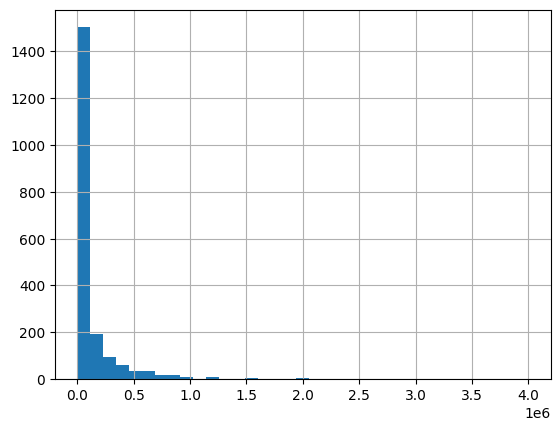

In [ ]:
candidatos['valor_item'].hist(bins=35)

# Questões 6 e 7

Classifique o valor total do patrimônio declarado
Faça um gráfico de barras da classificação de patrimônio

In [ ]:
def classificar_valor(valor):
    if pd.isna(valor):
        return 'valor ausente'
    elif valor <= 1000:
        return 'até 1 mil'
    elif 1001 <= valor <= 10000:
        return '1.001 a 10 mil'
    elif 10001 <= valor <= 100000:
        return '10.001 a 100 mil'
    elif 100000 < valor <= 1_000_000:
        return '100 mil a 1 milhão'
    elif 1_000_000 < valor <= 10_000_000:
        return '1 a 10 milhões'
    else:
        return 'acima de 10 milhões'

In [ ]:
candidatos['faixa_valor_item'] = candidatos['valor_item'].apply(classificar_valor)

<Axes: ylabel='faixa_valor_item'>

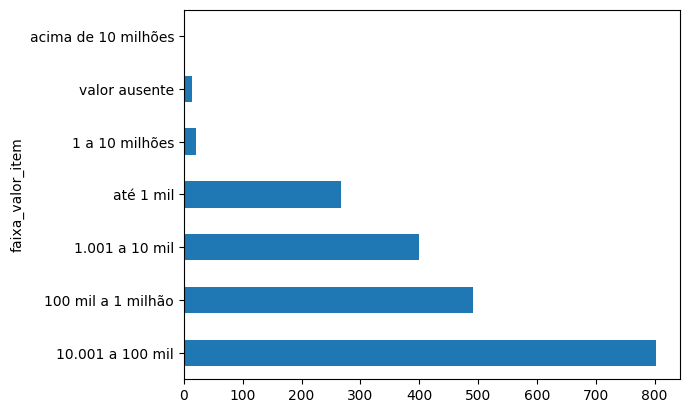

In [ ]:
candidatos['faixa_valor_item'].value_counts().plot(kind='barh')

# Questão 8

Faça um subset selecionando apenas um partido e refaça o gráfico de barras da classificação de patrimônio

In [ ]:
df_pt = candidatos.loc[candidatos['sigla_partido'] == 'PT']

<Axes: ylabel='faixa_valor_item'>

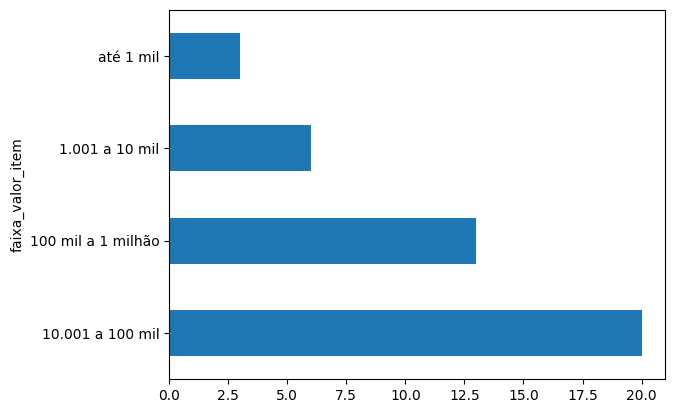

In [ ]:
df_pt['faixa_valor_item'].value_counts().plot(kind='barh')